Cameron Roehlk
ABE 516X
Case Study 2

In this case study, Ji Yeow let me use his raw data from his water quality tests. 

The research questions I am looking at are:
What are the differences in average flow between base flow and event flow? 
Do event samples have higher dissolved reactive phosphorus/total phosphorus/total suspended solid concentrations than base flow samples?

The first step is to import the raw excel data

In [61]:
import pandas as pd 
import numpy as np
df=pd.read_excel("ABE516x case study 2 raw data.xlsx", sheet_name = "S11")
df.head()

,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,2015-03-20,Base,0.0060,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6
1,2015-03-27,Base,0.0060,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8
2,2015-04-03,Base,0.0240,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8
3,2015-04-11,Base,0.0245,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0
4,2015-04-17,Base,0.0250,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0


In [62]:
waterdata = pd.concat(pd.read_excel("ABE516x case study 2 raw data.xlsx", sheet_name = None), ignore_index=True)
waterdata

,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,2015-03-20,Base,0.006000,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6
1,2015-03-27,Base,0.006000,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8
2,2015-04-03,Base,0.024000,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8
3,2015-04-11,Base,0.024500,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0
4,2015-04-17,Base,0.025000,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0
5,2015-04-22,Base,0.000000,0.045,0.065,0.500000,0.500000,0.0451,45.6748,39.2
6,2015-04-25,Base,0.017000,0.014,0.017,1.219512,1.219512,0.0487,44.7043,40.0
7,2015-05-01,Base,0.012967,0.005,0.003,6.195158,5.147720,0.0196,46.4408,40.0
8,2015-05-09,Base,0.015062,0.007,0.005,12.598236,10.608635,0.0211,45.1269,39.2
9,2015-05-12,Base,0.018423,0.012,0.014,1.351351,0.500000,0.0247,45.1464,41.4


The above data frame brings in the data on both sheets and combines the data into a single data frame since the two sheets have identical column headings. However now we don't know from which sheet the data came from. Next step is to add a new column with the sheet name.

In [63]:
xl = pd.ExcelFile("ABE516x case study 2 raw data.xlsx")
df = pd.DataFrame()

for idx, name in enumerate(xl.sheet_names):
    sheet = xl.parse(name)
    if idx == 0:
        columns = sheet.columns
    sheet.columns = columns
    sheet['sheet_name'] = name
    df = df.append(sheet, ignore_index = True)

df.head()

,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L),sheet_name
0,2015-03-20,Base,0.0060,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6,S11
1,2015-03-27,Base,0.0060,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8,S11
2,2015-04-03,Base,0.0240,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8,S11
3,2015-04-11,Base,0.0245,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0,S11
4,2015-04-17,Base,0.0250,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0,S11


In [64]:
df

,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L),sheet_name
0,2015-03-20,Base,0.006000,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6,S11
1,2015-03-27,Base,0.006000,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8,S11
2,2015-04-03,Base,0.024000,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8,S11
3,2015-04-11,Base,0.024500,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0,S11
4,2015-04-17,Base,0.025000,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0,S11
5,2015-04-22,Base,0.000000,0.045,0.065,0.500000,0.500000,0.0451,45.6748,39.2,S11
6,2015-04-25,Base,0.017000,0.014,0.017,1.219512,1.219512,0.0487,44.7043,40.0,S11
7,2015-05-01,Base,0.012967,0.005,0.003,6.195158,5.147720,0.0196,46.4408,40.0,S11
8,2015-05-09,Base,0.015062,0.007,0.005,12.598236,10.608635,0.0211,45.1269,39.2,S11
9,2015-05-12,Base,0.018423,0.012,0.014,1.351351,0.500000,0.0247,45.1464,41.4,S11


My next step is to rename 'sheet_name' to 'Site Location'. This makes it easier for me to read the data.

In [65]:
df.columns = df.columns.str.replace('sheet_name','Site Location')
df.head()

,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L),Site Location
0,2015-03-20,Base,0.0060,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6,S11
1,2015-03-27,Base,0.0060,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8,S11
2,2015-04-03,Base,0.0240,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8,S11
3,2015-04-11,Base,0.0245,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0,S11
4,2015-04-17,Base,0.0250,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0,S11


To help organize my data, I want to move the Site Location column to the first column

In [66]:
columns = list(df)
columns.insert(0, columns.pop(columns.index('Site Location')))
columns

['Site Location',
 'Sample date',
 'Sample type',
 'Flow (cms)',
 'DRP (mg P/L)',
 'TP (mg P/L)',
 'TSS (mg/L)',
 'VSS (mg/L)',
 'Ammonia (mg/L)',
 'Nitrate (mg/L)',
 'TN (mg/L)']

In [67]:
df = df.ix[:, columns]
df

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Site Location,Sample date,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,S11,2015-03-20,Base,0.006000,0.020,0.025,1.692308,1.230769,0.0137,50.9792,41.6
1,S11,2015-03-27,Base,0.006000,0.020,0.014,0.500000,0.500000,0.0042,48.7837,40.8
2,S11,2015-04-03,Base,0.024000,0.001,0.015,1.231527,1.970443,0.0056,45.4211,42.8
3,S11,2015-04-11,Base,0.024500,0.012,0.029,7.540395,6.642729,0.0174,46.5769,43.0
4,S11,2015-04-17,Base,0.025000,0.001,0.016,1.691729,0.500000,0.0166,48.2718,43.0
5,S11,2015-04-22,Base,0.000000,0.045,0.065,0.500000,0.500000,0.0451,45.6748,39.2
6,S11,2015-04-25,Base,0.017000,0.014,0.017,1.219512,1.219512,0.0487,44.7043,40.0
7,S11,2015-05-01,Base,0.012967,0.005,0.003,6.195158,5.147720,0.0196,46.4408,40.0
8,S11,2015-05-09,Base,0.015062,0.007,0.005,12.598236,10.608635,0.0211,45.1269,39.2
9,S11,2015-05-12,Base,0.018423,0.012,0.014,1.351351,0.500000,0.0247,45.1464,41.4


Now I have my dataset organized in a clean format that makes sense to me. The next step is to look at the average flow between the two sample types to see what is the difference in average flow is. Then we can also look at the correlation to see if there is any relationship or connection between two or more or the columns.

In [68]:
FlowAvgs = df.groupby(['Site Location','Sample type'], as_index = False).mean()
FlowAvgs

,Site Location,Sample type,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
0,S11,Base,0.035100,0.014134,0.123671,80.034523,67.499641,0.061199,29.645126,30.688544
1,S11,Event,0.162764,0.030000,0.561431,1292.867828,1189.547045,0.139914,24.575203,28.722897
2,S12,Base,0.032000,0.022115,0.082046,18.590805,13.074713,0.063586,9.000000,9.409195
3,S12,Event,0.110238,0.040214,0.148500,89.411905,76.302381,0.053457,8.247619,9.830952


In [69]:
FlowAvgs.corr()

,Flow (cms),DRP (mg P/L),TP (mg P/L),TSS (mg/L),VSS (mg/L),Ammonia (mg/L),Nitrate (mg/L),TN (mg/L)
Flow (cms),1.000000,0.694782,0.870430,0.837314,0.836859,0.755320,0.078122,0.204001
DRP (mg P/L),0.694782,1.000000,0.268736,0.219001,0.218704,0.111125,-0.591972,-0.500549
TP (mg P/L),0.870430,0.268736,1.000000,0.997202,0.997082,0.974908,0.420792,0.532560
TSS (mg/L),0.837314,0.219001,0.997202,1.000000,0.999998,0.988812,0.427477,0.536591
VSS (mg/L),0.836859,0.218704,0.997082,0.999998,1.000000,0.989038,0.426616,0.535730
Ammonia (mg/L),0.755320,0.111125,0.974908,0.988812,0.989038,1.000000,0.440120,0.541698
Nitrate (mg/L),0.078122,-0.591972,0.420792,0.427477,0.426616,0.440120,1.000000,0.991588
TN (mg/L),0.204001,-0.500549,0.532560,0.536591,0.535730,0.541698,0.991588,1.000000


Now I want to insert boxplots to show the visual representation of the data.

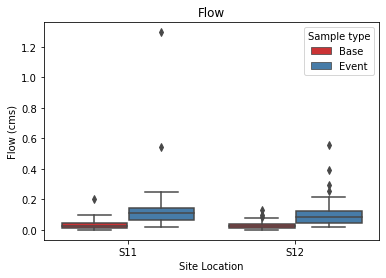

In [70]:
import seaborn as sns
import numpy as np

sns.boxplot(x="Site Location", y = "Flow (cms)", hue = "Sample type", data=df, palette="Set1")
plt.title("Flow")
plt.show()

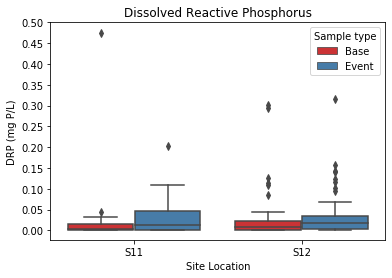

In [71]:
import seaborn as sns
import numpy as np

sns.boxplot(x="Site Location", y = "DRP (mg P/L)", hue = "Sample type", data=df, palette="Set1")
plt.title("Dissolved Reactive Phosphorus")
plt.yticks(np.arange(0, 0.525, 0.05))
plt.show()

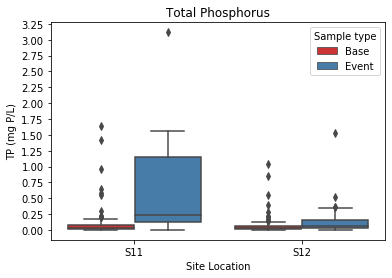

In [72]:
import seaborn as sns
import numpy as np

sns.boxplot(x="Site Location", y = "TP (mg P/L)", hue = "Sample type", data=df, palette="Set1")
plt.title("Total Phosphorus")
plt.yticks(np.arange(0, 3.5, 0.25))
plt.show()

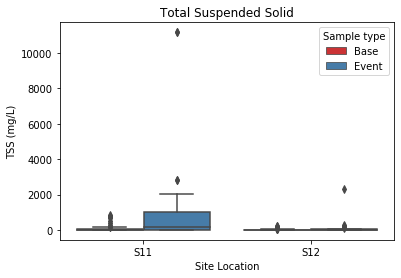

In [73]:
import seaborn as sns
import numpy as np

sns.boxplot(x="Site Location", y = "TSS (mg/L)", hue = "Sample type", data=df, palette="Set1")
plt.title("Total Suspended Solid")
plt.show()

In conclusion, event flow has a much higer average flow than base flow. Dissolved reactice phosphorus and total phosphorus is higher in event flow. The data shows there was a lot of total suspended solid during event flow in section 11. Section 11 had more total suspended solid on average compared to section 12.